<center><h1>Artificial intelligence applied to improve scientific reviews.

<center> <b>Consider citing us if you found this tool useful!</b>

# <a id='0' style=color:black>Table of Contents:</a>

1. [General overview](#1)
2. [Importing libraries](#2)
3. [Data description](#3)
4. [Data preparation](#4)
5. [Data cleaning](#5)
6. [Pre-processing of the texts](#6)
7. [Text analysis of cistus corpus](#7)
8. [Text clustering with K-means](#8)
9. [Find the optimal Number of Clusters](#9)
10. [Auto-tagging based on cluster centers](#10)
11. [Plotting clusters](#11)
12. [Distribution of clusters over the last 20 years](#12)
13. [Conclusion](#13)

# <a id='1' style=color:black>1. General overview</a>

<p style='text-align: justify;'>
<i>Cistus</i> is a genus of angiosperm plants of the cistaceae family, known as jaras, jaguarzos or steppes. They usually form part, sometimes important, of the Mediterranean garrigue, and some species behave as pioneers in the recovery of degraded soils. They are pyrophilic, their germination is favored by fire, and recurrent fires help their permanence by eliminating competition from other plants that would end up displacing them from the biotopes. Several plants of the <i>Cistus</i> genus, such as <i>Cistus salviifolius</i>, <i>Cistus ladanifer</i>, or <i>Cistus albidus</i>, among others, have been extensively studied in recent years due to their molecular composition and biological activity. Plants of the <i>Cistus</i> genus have been shown to possess antioxidant, antimicrobial, antitumor or metabolic syndrome regulatory capacity, among others.
<br><br>To the best of our knowledge, there is no literature review on the properties of plants of the <i>Cistus</i> genus made through the use of artificial intelligence applied to language processing.
<br><br><b>The aim of this study:</b>
<br>To analyze Scopus abstracts in order to highlight the various topics of <i>Cistus</i> research, going deeper into those related to its biological activity.<br>
<br><b>The specific aims are:</b>
<br>To use K-mean technique in order to categorize groups of research articles. This will allow to explore whether the information used in Scopus abstracts reflects the key concepts and the current understanding of <i>Cistus</i> uses.<br>
<br>To observe the trends of <i>Cistus</i> research over the past years based on Scopus abstracts of papers related to <i>Cistus</i>, which would indicate general trends of research efforts.
</p>

[Back to top](#0)

In [ ]:
#@title <b><font color="blue" size="+2">Configuring the system...
%%capture
from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <a id='2' style=color:black>2. Importing Libraries</a>

In [ ]:
# Data Structures
import pandas as pd
import numpy as np
#import nbib

# Corpus Processing
!pip install unidecode
import re
import nltk.corpus
from nltk.corpus                      import stopwords
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from sklearn                          import preprocessing
import string
import joblib
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud                        import WordCloud
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

import warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[Back to top](#0)

# <a id='3' style=color:black> 3. Data description</a>
<p style='text-align: justify;'>
Abstracts of the scientific publications that focusing on Cistus were searched and downloaded from Scopus, a free online Elsevier's abstract and citation database launched in 2004 (<a href="https://pubmed.ncbi.nlm.nih.gov/" target="_blank">https://www.scopus.com/search/form.uri?display=basic#basic</a>).
<br><br>Retrieved studies had to contain in their title the word “Cistus”.

</span>
<br><br>According to the search strategy, a total of 1601 papers were included.
<br><br>The results include various type of articles such as reviews, meta-analysis, survey, reports, research articles - academic and clinical research.
</p>

In the case of patent analysis, these were obtained from the Espacenet database (https://worldwide.espacenet.com).

[Back to top](#0)

# <a id='4' style=color:black>4. Data Preparation</a>
<p style='text-align: justify;'>
We downloaded the abstracts from the Scopus website to one csv file which its name is 'cistus.csv'.
<br>This file contains paragraphs of the abstracts category and their meta-information such as: authors, journal, year published, etc., that is, unstructured data.
<br>We will take this file and convert it to a Microsoft Excel compatible xlsx file to facilitate further analysis of the data. The final file name is cistus.xlsx.
</p>

In [ ]:
#@title <b><font color="blue" size="+2"> Uploading xlsx file
with Capturing() as output:
    print('Comenzamos....')
name_file = 'Investigacion Clinica con IA generativa (2).xlsx'  #@param {type: "string"}
link_gdrive = 'https://docs.google.com/spreadsheets/d/1C19cB9y14UKZOksvqlmV8_55VLQWgvT2/edit?usp=drive_link&ouid=115521689420821893722&rtpof=true&sd=true'  #@param {type: "string"}
with Capturing(output) as output:
    id_gdrive=link_gdrive[39:72]
    with open('getfile.txt', 'w') as writefile:
        writefile.write("--load-cookies /tmp/cookies.txt \"https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \'https://docs.google.com/uc?export=download&id=FILEID\' -O- | sed -rn \'s/.*confirm=([0-9A-Za-z_]+).*/\1\\n/p\')&id=")
        writefile.write(id_gdrive)
        writefile.write("\" -O ")
        writefile.write(name_file)
        writefile.write(" && rm -rf /tmp/cookies.txt")
    with open('getfile.txt', 'r') as testwritefile:
        variable=testwritefile.read()
    !wget {variable}
    print("xls file uploaded")

if output[-1]=='xls file uploaded':
    print(output[-1])
else:
    print(output[:-2])

df=pd.read_excel(name_file,sheet_name=0)

NameError: name 'Capturing' is not defined

In [ ]:
df.head()

Authors  \
0     Singh, R.; Ranjan, V.; Ganguly, A.; Halder, S.   
1  Xie, X.; Ma, S.-X.; Luo, X.-D.; Liao, D.-Y.; H...   
2    Ren, Y.; Shang, J.; Zhang, M.; Xu, X.; Geng, Z.   
3  Xia, L.; Huang, Y.; Ma, R.; Chu, Y.; Wu, G.; X...   
4  Yang, T.; Wang, Y.; Zhu, G.; Liu, W.; Cao, J.;...   

                                   Author full names  \
0  Singh, Raghuwansh (59233756200); Ranjan, Vivek...   
1  Xie, Xiao (57225097393); Ma, Shengxiao (580270...   
2  Ren, Yonggong (9844308700); Shang, Jia (601072...   
3  Xia, Ling (59437062000); Huang, Yujiang (58992...   
4  Yang, Tingting (58364495200); Wang, Yiwei (585...   

                                        Author(s) ID  \
0  59233756200; 58038781800; 35749906800; 8381178300   
1  57225097393; 58027097100; 57219447906; 5722511...   
2  9844308700; 60107244900; 58296045700; 57208263...   
3  59437062000; 58992159500; 58705894700; 6000420...   
4  58364495200; 58547165200; 55451891500; 6005385...   

                                               Title  Year  \
0  Arrhythmias detection using ECG with deep lear...  2025   
1  Automatic recognition of adrenal incidentaloma...  2025   
2  Federated learning with local–global collabora...  2025   
3  A magnetic coupled organic SERS platform integ...  2025   
4  TRI-PLAN: A deep learning-based automated asse...  2025   

                                      Source title Volume Issue Art. No.  \
0                     Engineering Research Express      7     4    45318   
1                               Annals of Medicine     57     1  2540596   
2  Chemometrics and Intelligent Laboratory Systems    267   NaN   105515   
3                    Biosensors and Bioelectronics    290   NaN   117988   
4              International Journal of Cardiology    441   NaN   133732   

  Page start  ...                             DOI  \
0        NaN  ...        10.1088/2631-8695/ae0f05   
1        NaN  ...   10.1080/07853890.2025.2540596   
2        NaN  ...  10.1016/j.chemolab.2025.105515   
3        NaN  ...      10.1016/j.bios.2025.117988   
4        NaN  ...    10.1016/j.ijcard.2025.133732   

                                                Link  \
0  https://www.scopus.com/inward/record.uri?eid=2...   
1  https://www.scopus.com/inward/record.uri?eid=2...   
2  https://www.scopus.com/inward/record.uri?eid=2...   
3  https://www.scopus.com/inward/record.uri?eid=2...   
4  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  Accurate arrhythmia detection is clinically cr...   
1  Background: The incidence of adrenal incidenta...   
2  Acute Coronary Syndrome (ACS) is a prevalent c...   
3  The sensitive detection of drug molecules in c...   
4  Background: Efficient and accurate preoperativ...   

                                     Author Keywords  \
0  arrhythmia; cardiovascular disease; classifica...   
1  Adrenal incidentalomas; CT; deep learning; mac...   
2  Acute coronary syndrome; Deep learning; Federa...   
3  Acetonitrile-mediated enrichment; Artificial i...   
4  Computed tomography angiography; Deep learning...   

                                      Index Keywords Document Type  \
0  Biomedical signal processing; Cardiology; Clin...       Article   
1  adrenal disease; adrenal gland; adrenal incide...       Article   
2  Cardiology; Data privacy; Diseases; Forecastin...       Article   
3  Body fluids; Clinical research; Diagnosis; Dru...       Article   
4  accuracy; adult; aortic valve surgery; Article...       Article   

  Publication Stage                                        Open Access  \
0             Final                                                NaN   
1             Final  All Open Access; Gold Open Access; Green Accep...   
2             Final                                                NaN   
3             Final                                                NaN   
4             Final                                                NaN   

   Sourc

In [ ]:
len(df)

8522

In [ ]:
print("Columns names:\n", df.columns)

Columns names:
 Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')


[Back to top](#0)

# <a id='5' style=color:black>5. Data Cleaning</a>

## Drop unnecessary columns

Since the goal of this analysis is to perform text analysis and clustering modeling, we will focus only on the text data from each title and abstract, discarding other metadata columns.

In [ ]:
df_final=df.copy()
df=df[['Title', 'Year','Abstract']]

In [ ]:
df.head()

Title  Year  \
0  Arrhythmias detection using ECG with deep lear...  2025   
1  Automatic recognition of adrenal incidentaloma...  2025   
2  Federated learning with local–global collabora...  2025   
3  A magnetic coupled organic SERS platform integ...  2025   
4  TRI-PLAN: A deep learning-based automated asse...  2025   

                                            Abstract  
0  Accurate arrhythmia detection is clinically cr...  
1  Background: The incidence of adrenal incidenta...  
2  Acute Coronary Syndrome (ACS) is a prevalent c...  
3  The sensitive detection of drug molecules in c...  
4  Background: Efficient and accurate preoperativ...

[Back to top](#0)

## Remove missing values
As one can see from the following command, there are no missing values in any of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     8522 non-null   object
 1   Year      8522 non-null   int64 
 2   Abstract  8522 non-null   object
dtypes: int64(1), object(2)
memory usage: 199.9+ KB


[Back to top](#0)

## Save and Load (optionally)

### Saving data to CSV file
One can choose to save the dataframe in .csv files for faster access during computational analyses.<br>
We'll use pandas to save the DataFrame to csv file

In [ ]:
#df.to_csv('cistus_abstracts_clean.csv')
# Uncomment the following to save the file

### Loading data

We'll use pandas to read the csv file contaning the titles and abstracts for each PMID.


In [ ]:
#df = pd.read_csv('cistus_abstracts_clean.csv')
#df.head()
# Uncomment the following to load cistus abstracts data

[Back to top](#0)

# <a id='6' style=color:black>6. Pre-processing of the texts</a>

## The corpus
The 'abstract' and 'title' columns fetched from Scopus contain words in the format of sentences, therefore the data require pre-processing prior to text analysis.
First, the abstracts and titles columns should be extracted and connected.

In [ ]:
corpus = df['Title']+df['Abstract']
corpus = corpus.tolist()
print(len(corpus))
contador=0
for entrada in corpus:
    if type(entrada) == str:
        contador+=1
print(contador)

8522
8522


In this stage we will convert unstructured text data into normalized and structured data using the Python NLTK (Natural Language Toolkit) library.
<br><br>
The text data pre-processing involves three steps:<br>
1) noise removal<br>
2) normalization<br>
3) tokenization<br>

[Back to top](#0)

## Noise removal

Data cleaning of our corpus done with processCorpus function will:

1. Lowercase the text.
2. Remove all words that don't contribute to the semantic meaning of the text (words that are not within the english alphabet (i.e e-mails and URLs).
3. Remove punctuation.
4. Remove numbers.
5. Remove stop words. The stop words are the most common words used in a language. In English, common stop words include “the”, “a”, “is”, “what“, “will“, “you“ etc. stop words also conclude connecting words that connect ideas together, for example, “and”, “but” and “so”.
6. Remove costum stop words that we define. The list conlude generic words that appear in the abstracts like: “abstract“, “background“, “results“, and “conclusions“.
7. Replace costum synonyms words that we define to avoid ambiguous terms.
8. Remove any words composed of less than 2 or more than 21 letters.
9. Remove any excess white spaces.
10. Return clean list.


In [ ]:
# Handling unwanted Symbols and Words
!wget https://raw.githubusercontent.com/F-J-A-M/AI_language_processing/main/stop_words_1.txt
def processCorpus(corpus):

    stopwords = nltk.corpus.stopwords.words('english')
    stopwords_costum = [line.rstrip('\n') for line in open('stop_words_1.txt')] # Load .txt file line by line
    #syn_dict = {'women':'woman','female':'woman','men':'man','male':'man','children':'child','infants child':'infant','infants':'infant', }
    #syn_keys=list(syn_dict.keys())

    for index, abstract in enumerate(corpus):

        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        corpus[index] = corpus[index].replace(u'\ufffd', '')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(u'\xa0', u'')    # remove '\xa0' a non-breaking space in Latin1 (ISO 8859-1)


        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words

        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase

        for c in string.punctuation:                            # Remove punctuation
            corpus[index]= corpus[index].replace(c," ")


        #corpus[index] = re.sub(r'young adult', 'young', corpus[index])
        #corpus[index] = re.sub(r'first time', 'firsttime', corpus[index])
        #corpus[index] = re.sub(r'over time', 'overtime', corpus[index])
        #corpus[index] = re.sub(r'life time', 'lifetime', corpus[index])

        #for syn in syn_keys:
        #    corpus[index]=corpus[index].replace(syn, syn_dict[syn]) # replace synonyms


        corpus[index] = re.sub(' +', ' ', corpus[index])            # Remove Additional Spaces

        corpus[index] = ''.join(i for i in corpus[index] if not i.isdigit())  # removes numbers

        listOfTokens = word_tokenize(corpus[index])

        # removes a list of words (stopwords) from a tokenized list.
        listOfTokens = [w for w in listOfTokens if not w in stopwords]
        # removes a list of words (costom_words) from a tokenized list.
        listOfTokens = [w for w in listOfTokens if not w in stopwords_costum]

        # removes any words composed of less than 2 or more than 21 letters
        twoLetterWord = twoLetters(listOfTokens)
        listOfTokens = [w for w in listOfTokens if not w in twoLetterWord]

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

# removing any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) < 3 or len(token) >21:
            twoLetterWord.append(token)
    return twoLetterWord



--2025-11-03 21:47:44--  https://raw.githubusercontent.com/F-J-A-M/AI_language_processing/main/stop_words_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\W'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\S'
<>:21: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-3540447020.py:12: SyntaxWarning: invalid escape sequence '\S'
  corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
/tmp/ipython-input-3540447020.py:20: SyntaxWarning: invalid escape sequence '\S'
  corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
/tmp/ipython-input-3540447020.py:21: SyntaxWarning: invalid escape sequence '\W'
  corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words


200 OK
Length: 7281 (7.1K) [text/plain]
Saving to: ‘stop_words_1.txt’

stop_words_1.txt    100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-11-03 21:47:45 (46.4 MB/s) - ‘stop_words_1.txt’ saved [7281/7281]



In [ ]:
# Display the results before we apply processCorpus function
corpus[18]

'Detection of obstetric anal sphincter injuries using machine learning-assisted impedance spectroscopy: a prospective, comparative, multicentre clinical studyTo evaluate the clinical performance and safety of the ONIRY system for obstetric anal sphincter injuries (OASI) detection versus three-dimensional endoanal ultrasound (EAUS). A prospective, comparative, multicentre, international study. Poland, Czechia, Slovakia, and Spain. 152 women between the first moments up to 8 weeks after vaginal delivery. Participants underwent EAUS and were allocated to groups based on OASIS classification: A (no perineal tear), B (1st or 2nd degree tear), or C (3rd or 4th degree, anal sphincters affected). Electric impedance was measured in the anal canal using the ONIRY system. The primary endpoint was the diagnostic outcome of impedance spectroscopy versus EAUS. Adverse events were collected. Part II involved in silico modelling and 10-time 10-fold cross-validation for automated analysis. Accuracy, se

In [ ]:
import nltk
nltk.download('punkt_tab')
corpus = processCorpus(corpus)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Check the results of processCorpus function
corpus[18]

'detection obstetric anal sphincter injuries machine learning assisted impedance spectroscopy prospective comparative multicentre clinical studyto evaluate clinical performance safety oniry obstetric anal sphincter injuries oasi detection dimensional endoanal ultrasound eaus prospective comparative multicentre international poland czechia slovakia spain women moments weeks vaginal delivery underwent eaus allocated oasis classification perineal tear degree tear degree anal sphincters electric impedance measured anal canal oniry primary endpoint diagnostic impedance spectroscopy eaus adverse events collected involved silico modelling cross validation automated accuracy sensitivity specificity women allocated diagnostic determined accuracy sensitivity specificity assisted impedance spectroscopy eaus cleaning performance metrics proposed final model oniry adverse device effects deficiencies enabling early sphincter injuries assisted impedance spectroscopy facilitates timely diagnosis reduc

[Back to top](#0)

## Normalizing the text

Normalizing of our corpus will be done with normalizeCorpus function.

Normalization refers to stemming. Stemming is a technique that reduces a word to it's root. <br>
The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words study, studies and studying stems into studi, which is not an English word. But its allow to keep all of the remaining words in the simplest format possible, so we can apply a function that gives weights to each word.

Returns normalized list.

In [ ]:
# Normalizing the text
def normalizeCorpus(corpus):
    param_stemmer = SnowballStemmer('english')
    for index, document in enumerate(corpus):

        listOfTokens = word_tokenize(corpus[index])
        # applies stemming to a list of tokenized words
        listOfTokens = [param_stemmer.stem(w) for w in listOfTokens]
        # removes any words composed of less than 2 or more than 21 letters
        twoLetterWord = twoLetters(listOfTokens)
        listOfTokens = [w for w in listOfTokens if not w in twoLetterWord]
        corpus[index]   = " ".join(listOfTokens)
    return corpus

In [ ]:
corpus = normalizeCorpus(corpus)

In [ ]:
# Check the results of normalizeCorpus function
corpus[18]

'detect obstetr anal sphincter injuri machin learn assist imped spectroscopi prospect compar multicentr clinic studyto evalu clinic perform safeti oniri obstetr anal sphincter injuri oasi detect dimension endoan ultrasound eaus prospect compar multicentr intern poland czechia slovakia spain women moment week vagin deliveri underw eaus alloc oasi classif perin tear degre tear degre anal sphincter electr imped measur anal canal oniri primari endpoint diagnost imped spectroscopi eaus advers event collect involv silico model cross valid autom accuraci sensit specif women alloc diagnost determin accuraci sensit specif assist imped spectroscopi eaus clean perform metric propos final model oniri advers devic effect defici enabl earli sphincter injuri assist imped spectroscopi facilit time diagnosi reduc long term complic faecal incontin rapid bedsid applic obstetr support postpartum care complement digit rectal optim clinic decis make elsevi right reserv'

[Back to top](#0)

## Tokenizing the text
Tokenization is used to split the sentences into words (tokenization).<br>
This stage concluded in the following function - TfidfVectorizer, which among other things, convert a collection of text documents to a matrix of tokens.

[Back to top](#0)

## Feature weighting

In this stage we will convert the tokenized abstracts into a matrix that will serve as an input for clustering model. This process is referred to “vectorization”.

The tokenized object will be vectorized using the Term Frequency - Inverse Document Frequency (TF-IDF) method. The TF-IDF is a feature Statistical weighting of Words algorithm that calculate the importance of words in each abstract relative to what is in that abstract but also relative to all the abstracts in the corpus. This normalization increases the importance of words that appear multiple times in the same abstract while decreasing the importance of words that appear in many abstracts (which would mostly be generic terms). TF-IDF give each word in an abstract a score that ranges from zero to one.

TFIDF Vectorizer (TfidfVectorizer) will be used with its default parameters.

The final corpus is a feature matrix.

In [ ]:
# Function that runs the TF-IDF function and returns a vector and dataframe of  weighting words
def TfidFun(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    tf_final = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

    return X, tf_final, vectorizer

[Back to top](#0)

# <a id='7' style=color:black>7. Text analysis of cistus corpus</a>

In this section we will use exploratory analysis tools to aggregate and visualize the text data associated with cistus.
<br>

We’ll make a bar plot and word cloud using matplotlib the wordcloud package to get a visual representation of the most frequent occurring words in the abstracts that were related to cistus.

In [ ]:
# Join all abstracts together
corpuse_all=[(" ".join(corpus))]
corpuse_all

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Call to TF-IDF function to create vector and dataframe of  weighting words for  all abstracts
X_all, tf_final_all, vectorizer_all = TfidFun(corpuse_all)

We will used the command X.toarray(), to print the matrix (and not just X).
The reason is that since there are many features, but only a few of them are represented in each abstract, sklearn choses to store the matrix as a "sparse matrix" - which has much more efficient memory footprint (but it's print is different than regular matrix).
Therefore, we transformed it into a two dimensional array and printed it.

In [ ]:
X_all.toarray()

array([[1.09314404e-04, 1.82190673e-04, 1.82190673e-05, ...,
        3.64381345e-05, 1.82190673e-05, 5.46572018e-05]])

Each row represents an abstract, and each column represents a feature (a word). (Here all abstracts are concatenate, so there is only one row). Each word in an abstract get a TF-IDF score that ranges from zero to one. This number represents how many times each of the features appear in this abstract.

In [ ]:
# print the feature names (and order of columns)
print(vectorizer_all.get_feature_names_out())

['aaa' 'aac' 'aacr' ... 'zur' 'zurich' 'zygos']


In [ ]:
# Print the first 10 words with highest weight on document 0:
x_all=tf_final_all.T.nlargest(10, 0)
print(x_all.index.tolist())

['model', 'clinic', 'learn', 'predict', 'medic', 'valid', 'perform', 'right', 'reserv', 'elsevi']


In [ ]:
#totalWord=np.sum(X_all)
#print("total words",totalWord)
totalUniqueWords=X_all.shape[1]
print("total unique words",totalUniqueWords)

#you could also get it by this:
print("total unique words",len(vectorizer_all.get_feature_names_out()))
print("first 20 features:",vectorizer_all.get_feature_names_out()[:20])

total unique words 27731
total unique words 27731
first 20 features: ['aaa' 'aac' 'aacr' 'aad' 'aadhar' 'aae' 'aafv' 'aaion' 'aal' 'aalborg'
 'aami' 'aamt' 'aao' 'aapm' 'aar' 'aarhus' 'aarno' 'aaron' 'aauc' 'aav']


In [ ]:
# create a dictionary from the first (and only) row
freq_vec=X_all.toarray()
freqDist=dict(zip(vectorizer_all.get_feature_names_out(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
freqDist

{'model': np.float64(0.28740578615830137),
 'clinic': np.float64(0.2818307515741847),
 'learn': np.float64(0.2733406662271312),
 'predict': np.float64(0.2451193310284492),
 'medic': np.float64(0.16131162159401585),
 'valid': np.float64(0.1531312603905244),
 'perform': np.float64(0.15251181210340034),
 'right': np.float64(0.15207455448895982),
 'reserv': np.float64(0.15198345915261804),
 'elsevi': np.float64(0.151673735009056),
 'imag': np.float64(0.1478659499499698),
 'machin': np.float64(0.14301967805658736),
 'develop': np.float64(0.14261885857668355),
 'healthcar': np.float64(0.1204098155765587),
 'accuraci': np.float64(0.11399670389809771),
 'featur': np.float64(0.10949659428281401),
 'improv': np.float64(0.10876783159207981),
 'diseas': np.float64(0.10865851718846968),
 'deep': np.float64(0.10410375037138091),
 'dataset': np.float64(0.09974939329424405),
 'includ': np.float64(0.09883843993082629),
 'train': np.float64(0.09565010315886416),
 'evalu': np.float64(0.09468449259364134)

## Word distribution plot
In order to see the top words and their relative frequencies, we'll create a bar chart.

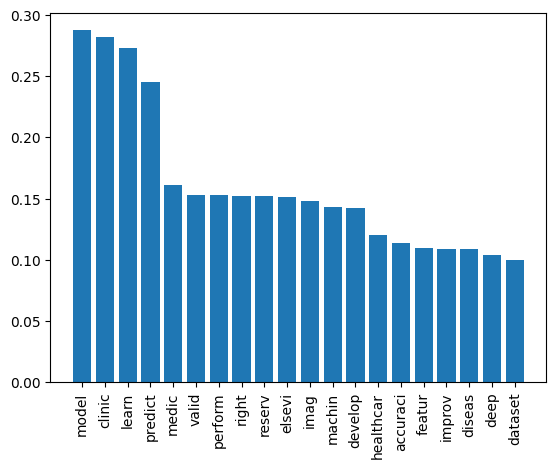

In [ ]:
topK=20
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

[Back to top](#0)

## WordClouds
WordCloud is a technique that shows which words are the most frequent among the given text.
we'll create wordcloud for all abstracts together using the top 75 words, based on the word frequencies dictionary:

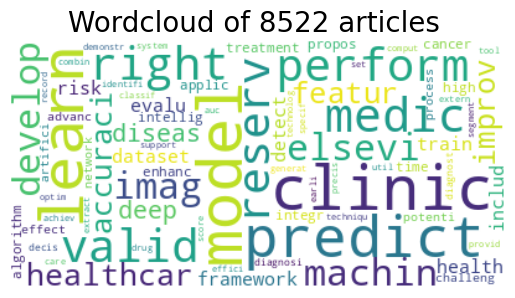

In [ ]:
#width = 4000, height = 1000, random_state=77,
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white").generate_from_frequencies(freqDist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud of "+str(len(df))+" articles ", fontsize=20)
plt.axis("off")
plt.show()

This representation allow us to understanding the data, to verify the preprocessing stage, ensuring we are on the right track or altertatively consider if any more preprocessing is necessary before training the model.

[Back to top](#0)

# <a id='8' style=color:black>8. Text Clustering with K-Means</a>

We have no prior knowledge with regards to the groups of our abstracts. In order to find structure in our unlabelled abstracts we should use unsupervised learning techniqe.

Here we will use k-means algorithm, a simple and popular unsupervised clustering algorithm, in order to find groups of similar abstracts in our corpus.

k-means algorithm calculate the distance between the points (abstracts) and group nearby abstracts together indicated that tey are similiar.

The K-Mean model will built with the KMeans function in the Python sklearn library.

## 'perform_k_means' function
This function Perform multiple K-means clustering.
In our case, the regular Kmeans implementation is too slow to run on laptop, so we use the MiniBatchKMeans algorithm. MiniBatchKMeans introduces some noise so we raised the batch and init sizes higher.
We also set the following parameters:
data - the dataset to run the K-means clustering on.
max_k – the maximum range of clusters
num_clusters - the number of clusters to set the 'n_clusters' parameter with
All other parameters remain the default values

After the k-means model object will created, the command fit will be used to get the trained model and predicted values.

Returned values:
model - the trained k-means model
predicted_vals - the predicted values, corresponding to each row in the given input dataset.


In [ ]:
#Function that runs the K-Means algorithm max_k times and returns a dictionary of each k result
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, batch_size=2048, random_state=42, init_size=1400, n_init=20)
        kmeans_results.update( {k : kmeans.fit(data)} )
    return kmeans_results

## Create K-means models

In [ ]:
# Feature weighting
X, tf_final, vectorizer = TfidFun(corpus)

In [ ]:
#TARDA 5 MINUTOS PACIENCIA
# Running Kmeans 19 times from K=2 to K=20 in order to calculate different models of abstracts clustering
k = 20
kmeans_results = run_KMeans(k, tf_final)

In [ ]:
# Saving the models
filename = 'finalized_kmean_model.sav'
joblib.dump(kmeans_results, filename)

['finalized_kmean_model.sav']

In [ ]:
# load saved models from local directory
filename = 'finalized_kmean_model.sav'
kmeans_results = joblib.load(filename)

[Back to top](#0)

# <a id='9' style=color:black>9. Find the Optimal Number of Clusters</a>

Now we just have to figure out the optimal number of clusters to choose when running K-means algorithm using the given input parameters.
A good cluster is one with the distance between the points within the cluster less than the distance between points of two different clusters.

We evaluate for the optimal number of clusters using two predominant methods<br>
· Elbow method<br>
· Average Silhouette method

## Elbow method

In this method, we will calculate and plot the SSE for a range of cluster sizes and we will look for the value of  k  at which the total intra-cluster distance (SSE) tapers off, and creates line chart resembles an arm. the “elbow” (the point of inflection on the curve) is generally considered as an indicator of the appropriate number of clusters.

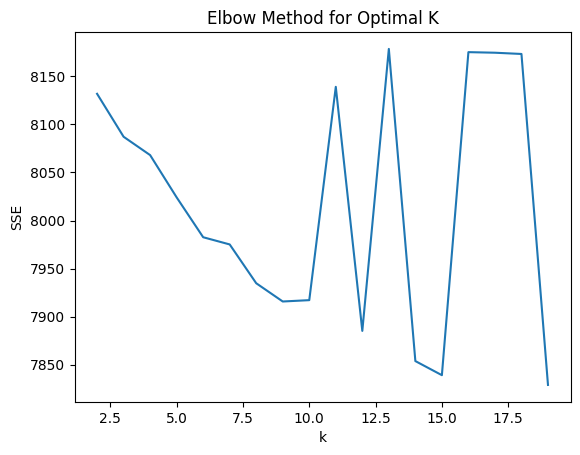

In [ ]:
ks = range(2,20)
scores = []

for k in ks:
    scores.append(kmeans_results[k].inertia_)

plt.plot(ks, scores)
plt.title('Elbow Method for Optimal K')
plt.ylabel('SSE')
plt.xlabel('k')
plt.show()

[Back to top](#0)

## Silhouette Score
Another method for clustering evaluation is silhouette_score. The silhouette value is a measure of how similar an abstract is to its own cluster (cohesion) compared to other clusters (separation).

In [ ]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))

def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)


    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks

    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')

    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    minx=1
    maxx=-0.2
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        minx=min( minx,min(ith_cluster_silhouette_values) )
        maxx=max(maxx,max(ith_cluster_silhouette_values))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(minx, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    ax1.set_xlim([minx, maxx])
    ax1.set_xticks([round(minx+((maxx-minx)/5)*i,2) for i in range(6)])
    plt.show()


def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )

        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

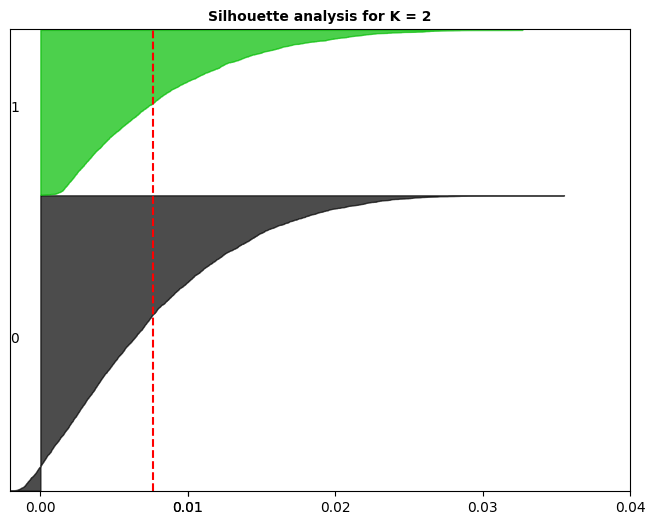

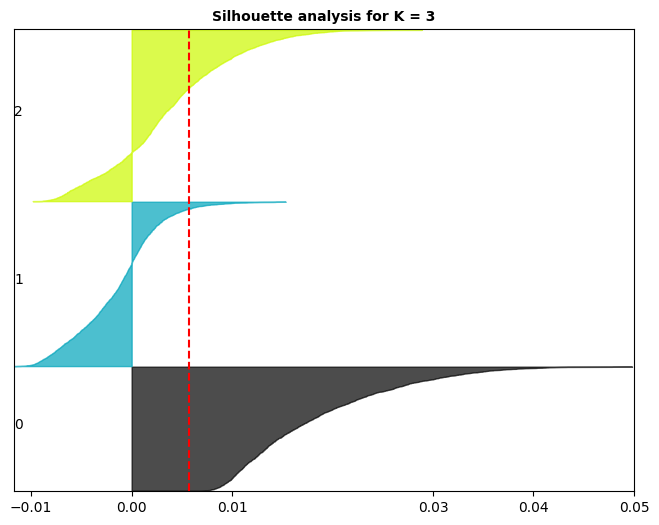

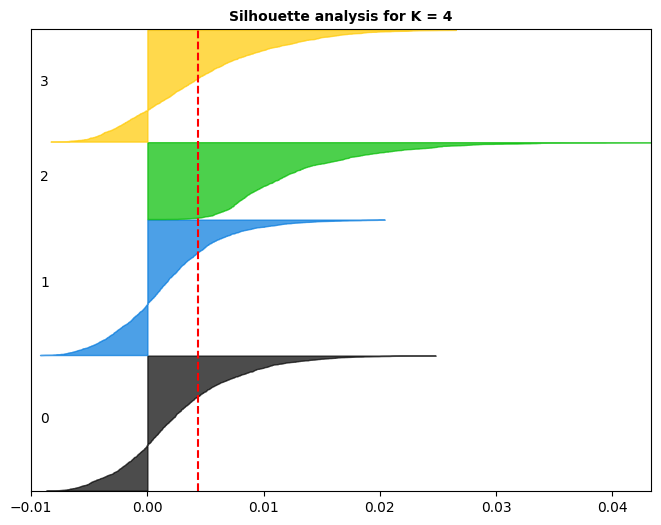

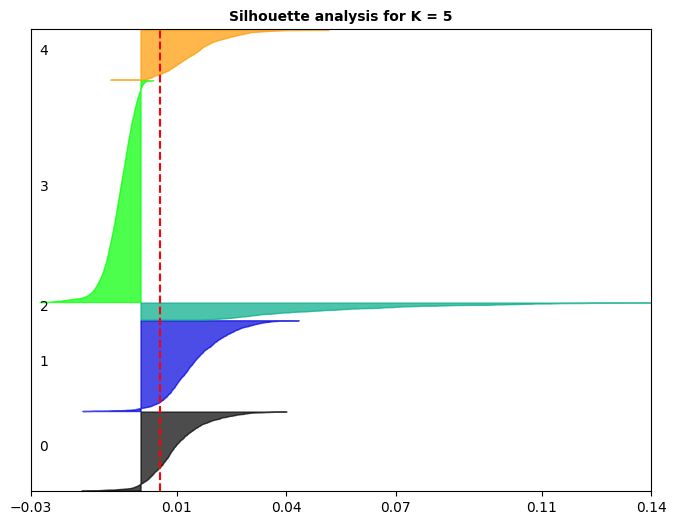

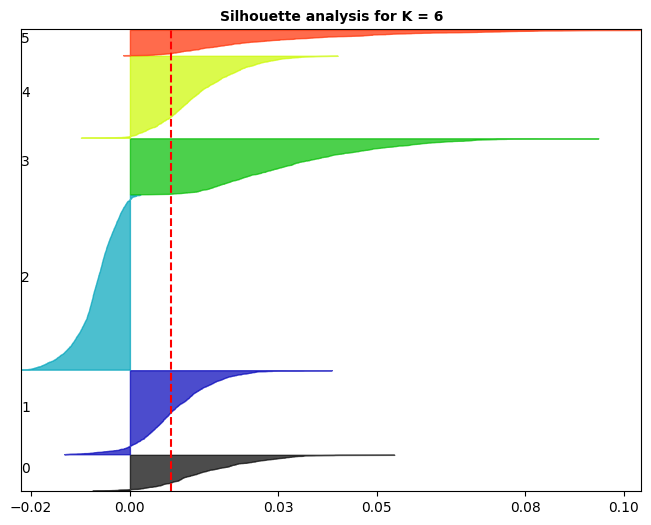

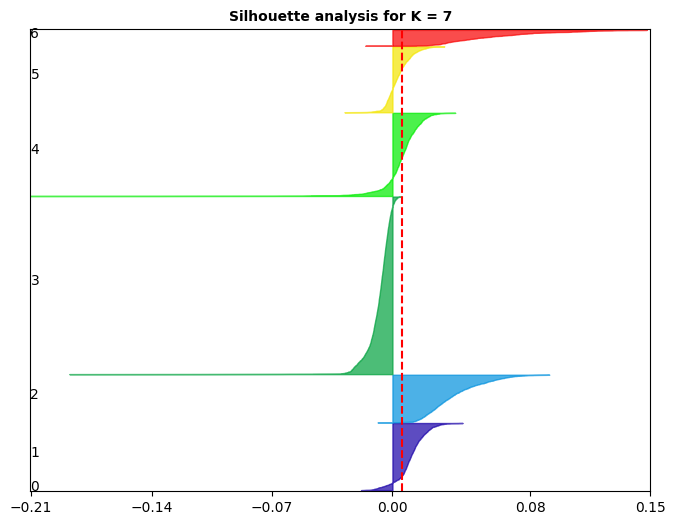

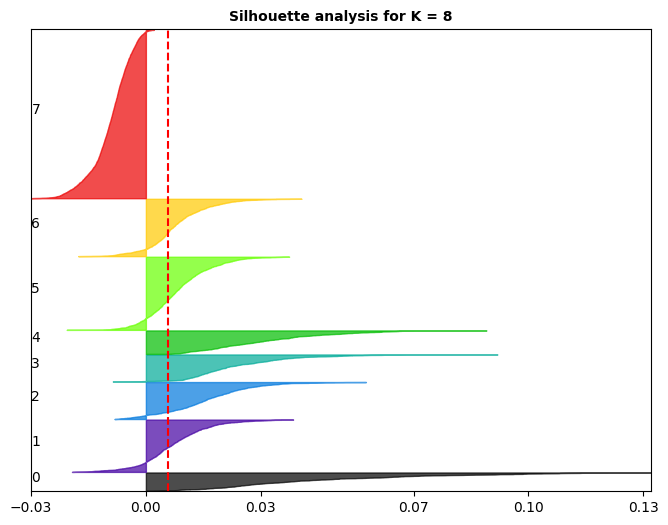

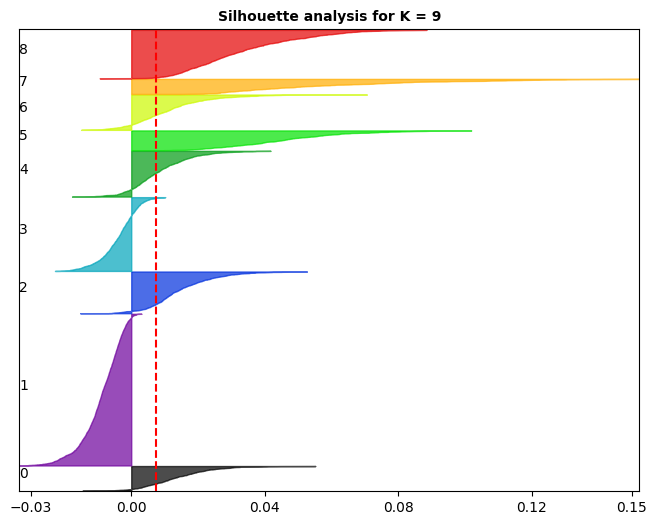

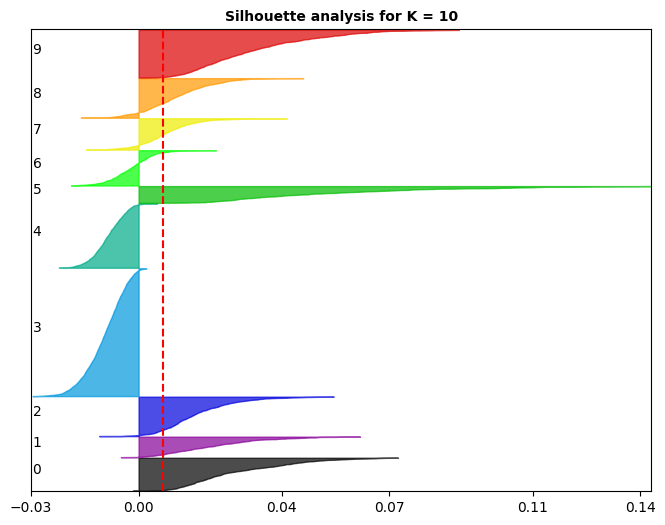

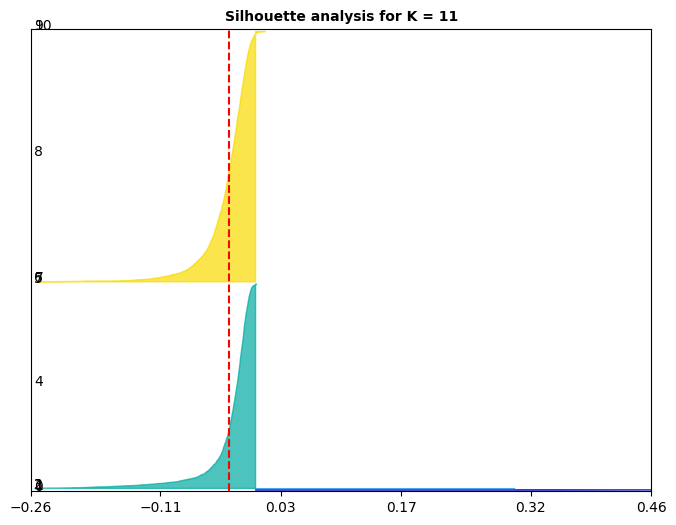

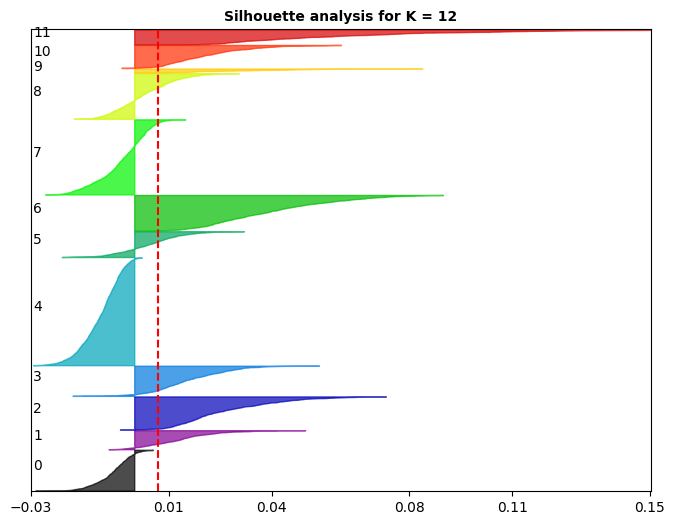

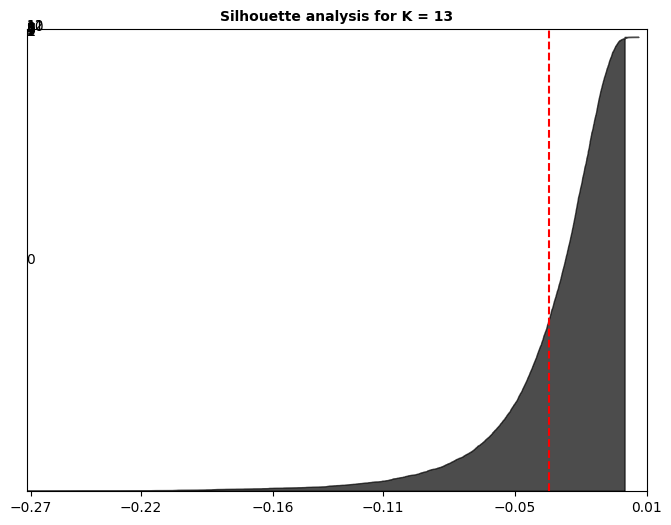

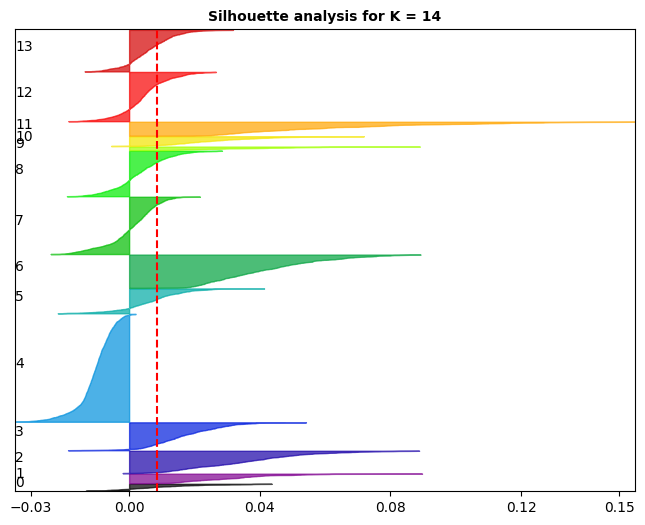

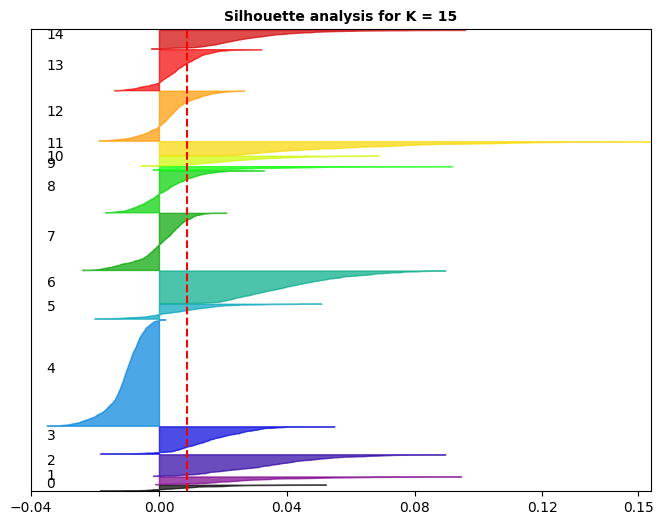

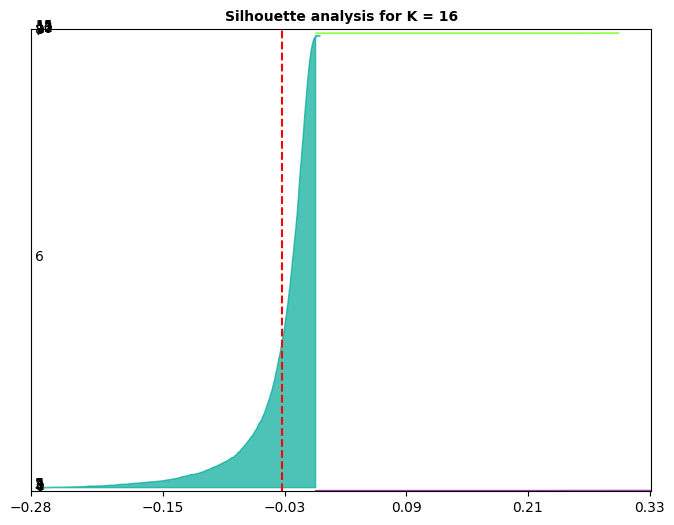

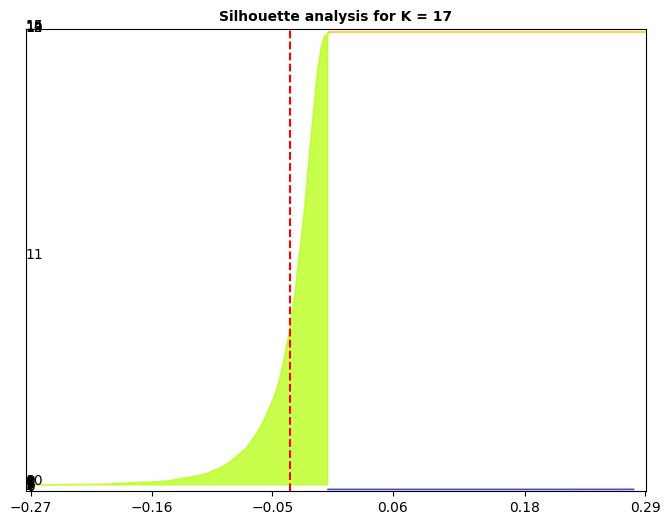

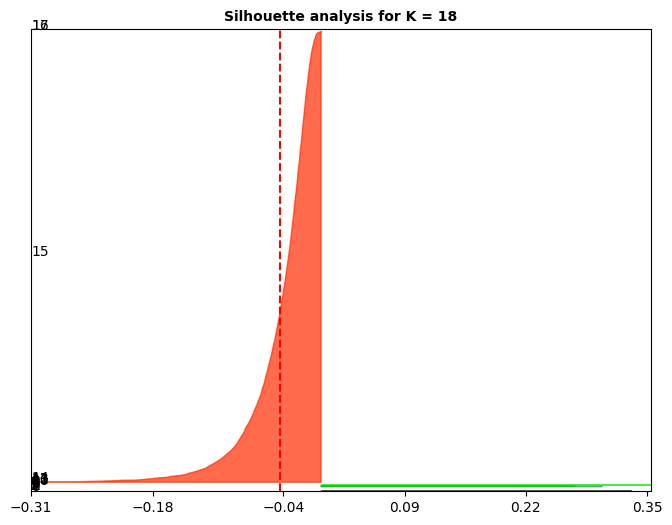

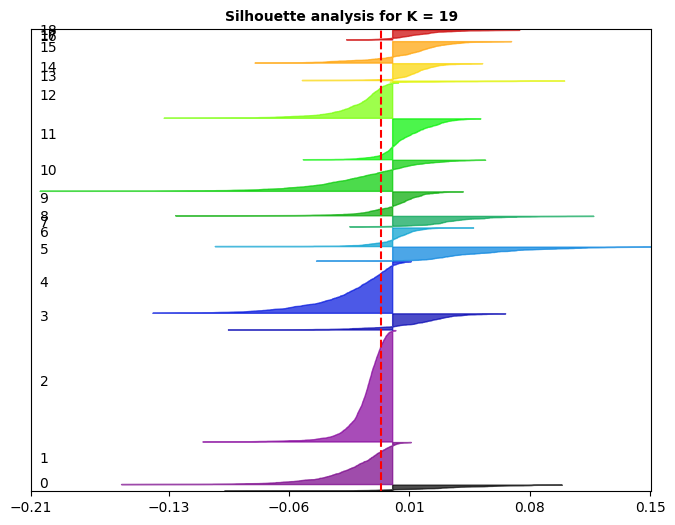

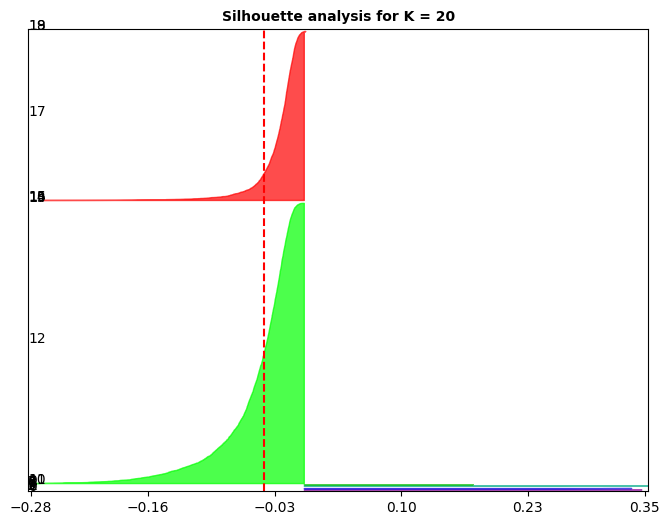

In [ ]:
# Plotting Silhouette Analysis
silhouette(kmeans_results, tf_final, plot=True)

Number of clusters= 2 	silhouette_score = 0.0076236252416342675 

Number of clusters= 3 	silhouette_score = 0.005730984007347756 

Number of clusters= 4 	silhouette_score = 0.004319420672618872 

Number of clusters= 5 	silhouette_score = 0.005242251912619132 

Number of clusters= 6 	silhouette_score = 0.008409602792706286 

Number of clusters= 7 	silhouette_score = 0.005552947219434014 

Number of clusters= 8 	silhouette_score = 0.0056735870879319715 

Number of clusters= 9 	silhouette_score = 0.007551134004432407 

Number of clusters= 10 	silhouette_score = 0.0069213816173538684 

Number of clusters= 11 	silhouette_score = -0.030665743307819737 

Number of clusters= 12 	silhouette_score = 0.006857635389355755 

Number of clusters= 13 	silhouette_score = -0.03451538342989045 

Number of clusters= 14 	silhouette_score = 0.008552149967914015 

Number of clusters= 15 	silhouette_score = 0.008929832174783096 

Number of clusters= 16 	silhouette_score = -0.032282567940846336 

Number of clu

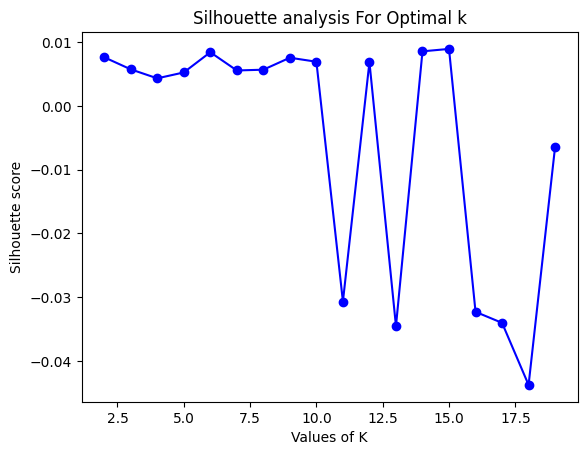

In [ ]:
# Alternatively, uncomment the following to print only the Silhouette Score
ks = range(2,20)
silhouette_avg = []
for k in ks:
    kmeans = kmeans_results.get(k)
    tf_final_array = tf_final.to_numpy()
    prediction =  kmeans.predict(tf_final)
    print("Number of clusters=",k,"\tsilhouette_score =",silhouette_score(X, prediction),"\n")
    silhouette_avg.append(silhouette_score(X, prediction))
plt.plot(ks,silhouette_avg,"bo-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

[Back to top](#0)

## Text analysis for each cluster

We look at the clusters generated by k-means.
In order to evaluate the resulting categorization, ten top key words, based on their TFIDF score, are presented for each cluster.

In [ ]:
#selecciona el numero de cluster que desees
best_result = 10 # 15 es el óptimo pero elegimos 5 por claridad

In [ ]:
# Print the most dominant words in each cluster at the X clusters generated by k-means.

kmeans_best_result = kmeans_results.get(best_result)
words = vectorizer.get_feature_names_out()
common_words = kmeans_best_result.cluster_centers_.argsort()[:,-1:-15:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : radiom, model, predict, auc, featur, valid, set, extern, curv, clinic, perform, imag, nomogram, cancer
1 : segment, imag, tumor, deep, net, lesion, mri, model, learn, dataset, dice, brain, medic, autom
2 : predict, diseas, learn, machin, model, accuraci, featur, heart, dataset, cancer, ensembl, diabet, techniqu, earli
3 : predict, clinic, model, risk, valid, machin, develop, learn, treatment, score, perform, hospit, includ, health
4 : medic, learn, diseas, imag, clinic, deep, diagnosi, framework, machin, detect, model, predict, applic, network
5 : drug, discoveri, develop, pharmaceut, clinic, target, intellig, predict, artifici, compound, repurpos, therapeut, learn, medicin
6 : cancer, clinic, intellig, artifici, diagnost, imag, detect, radiologist, breast, valid, accuraci, model, perform, lesion
7 : imag, medic, generat, learn, model, synthet, dataset, deep, train, ray, network, propos, detect, classif
8 : ehr, languag, llms, health, clinic, record, medic, electron, text, extract,

[Back to top](#0)

## Visualisation of top words


In [ ]:
# Produce simple bar plots to look at the most frequent words in each cluster
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(12, 6))
    for i in range(0, len(dfs)):
        plt.rcParams['font.size'] = '18'
        plt.figure(figsize=(12, 6))
        plt.title(("Most common words in Cluster {}".format(i)), fontsize=18, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()
        plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

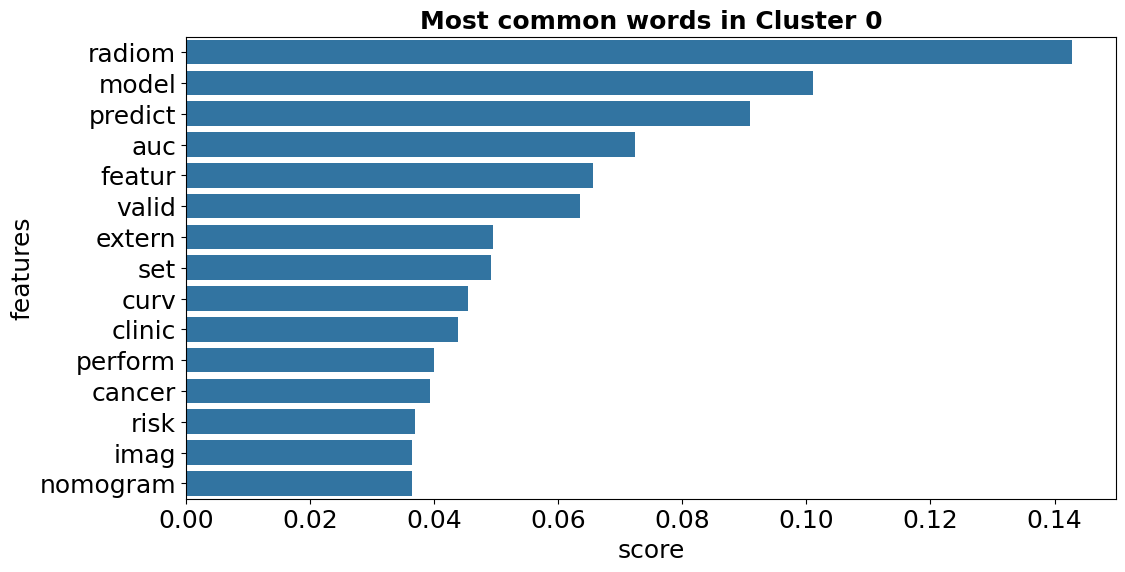

<Figure size 1200x600 with 0 Axes>

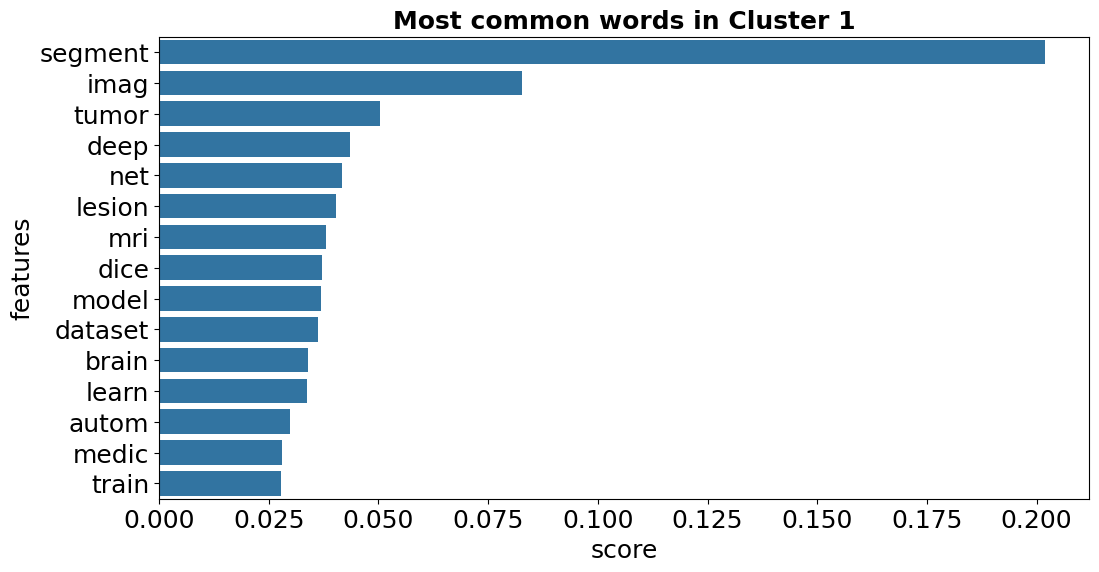

<Figure size 1200x600 with 0 Axes>

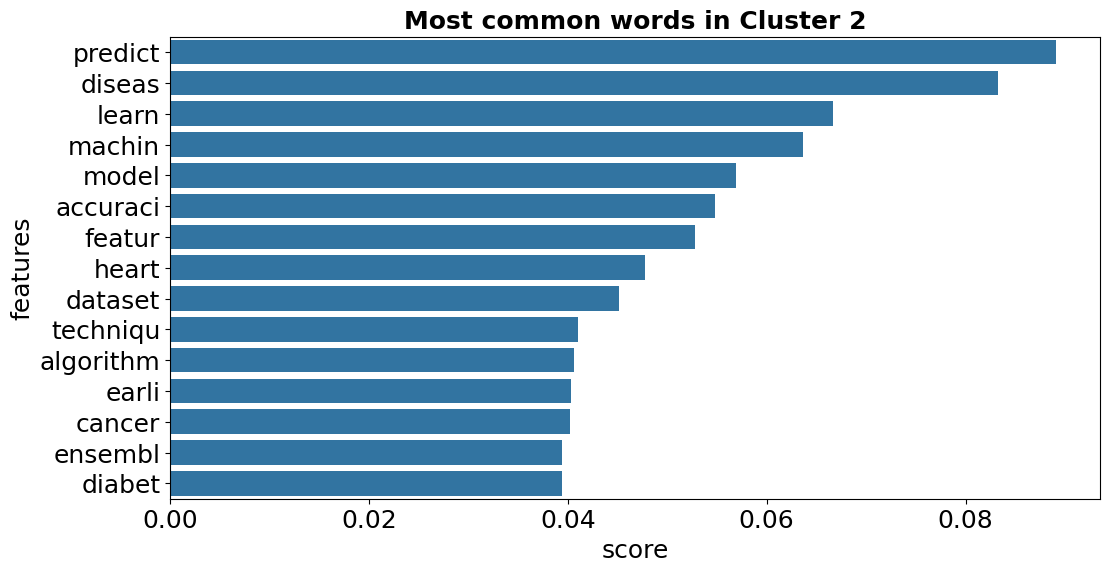

<Figure size 1200x600 with 0 Axes>

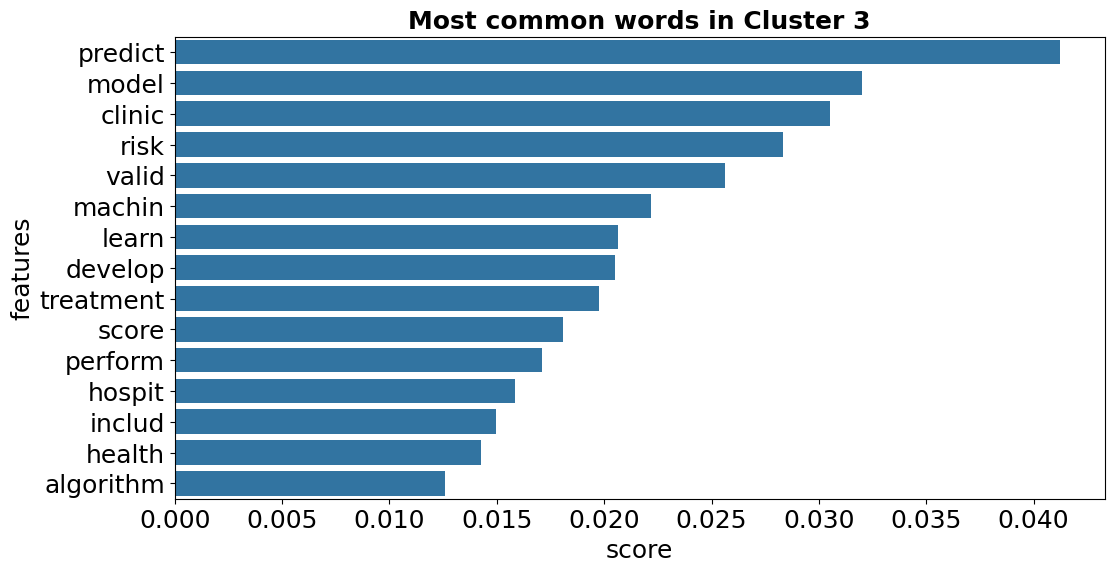

<Figure size 1200x600 with 0 Axes>

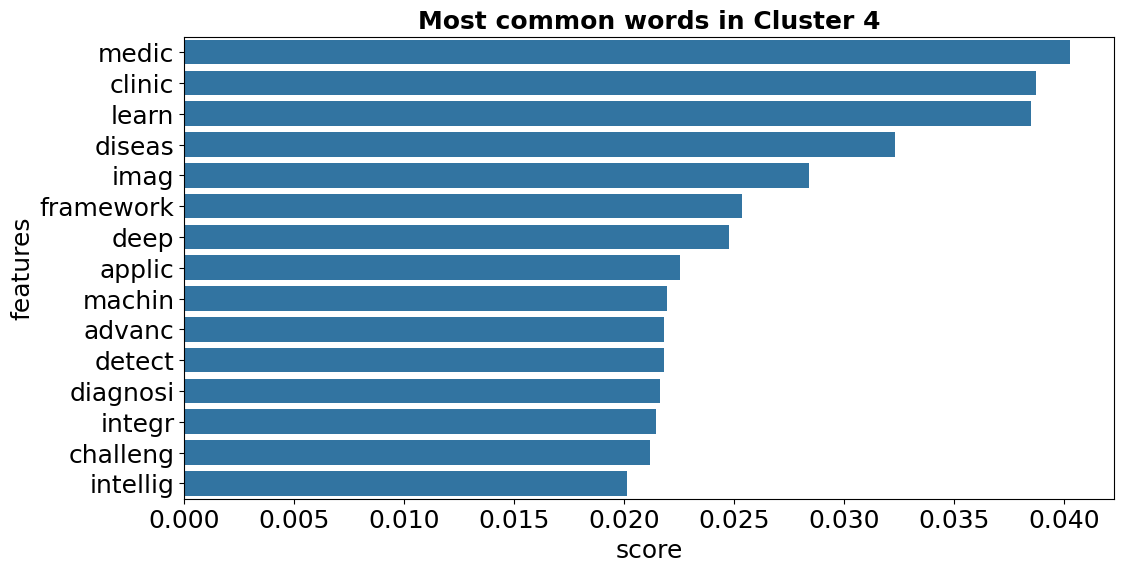

<Figure size 1200x600 with 0 Axes>

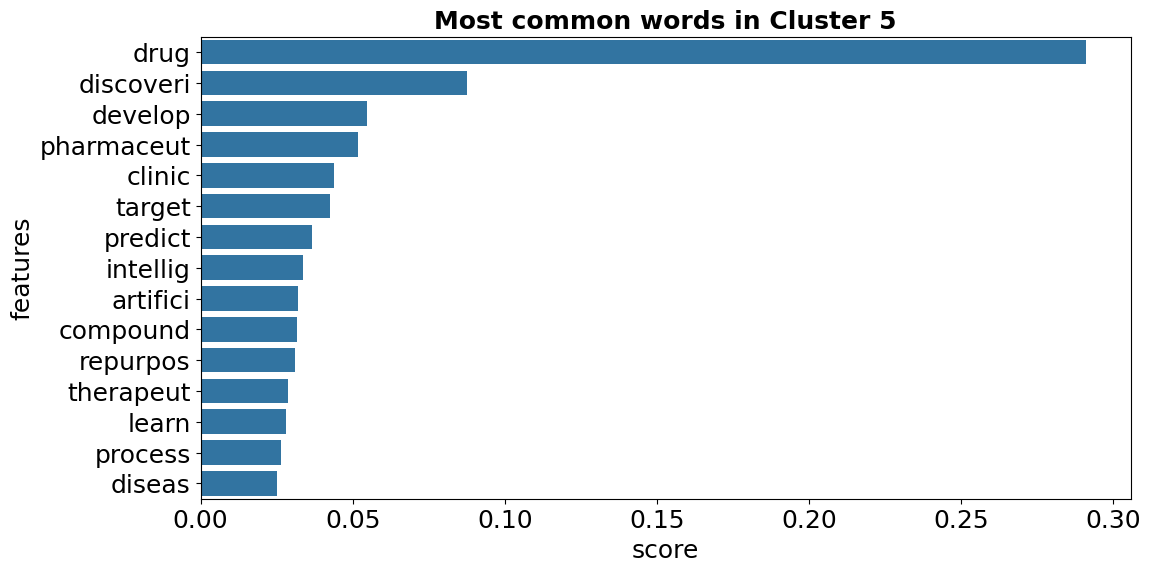

<Figure size 1200x600 with 0 Axes>

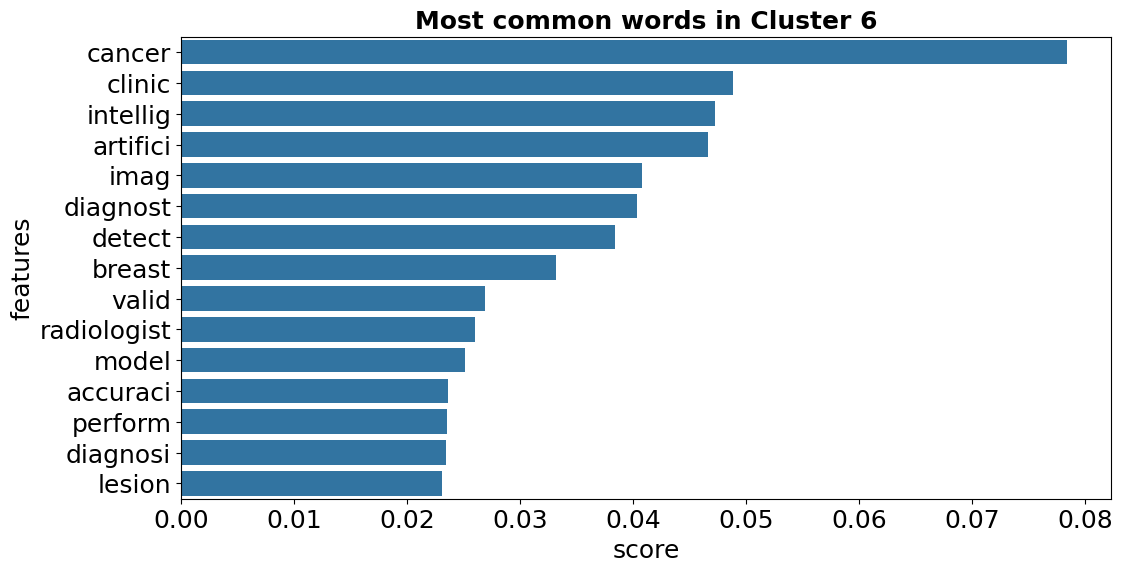

<Figure size 1200x600 with 0 Axes>

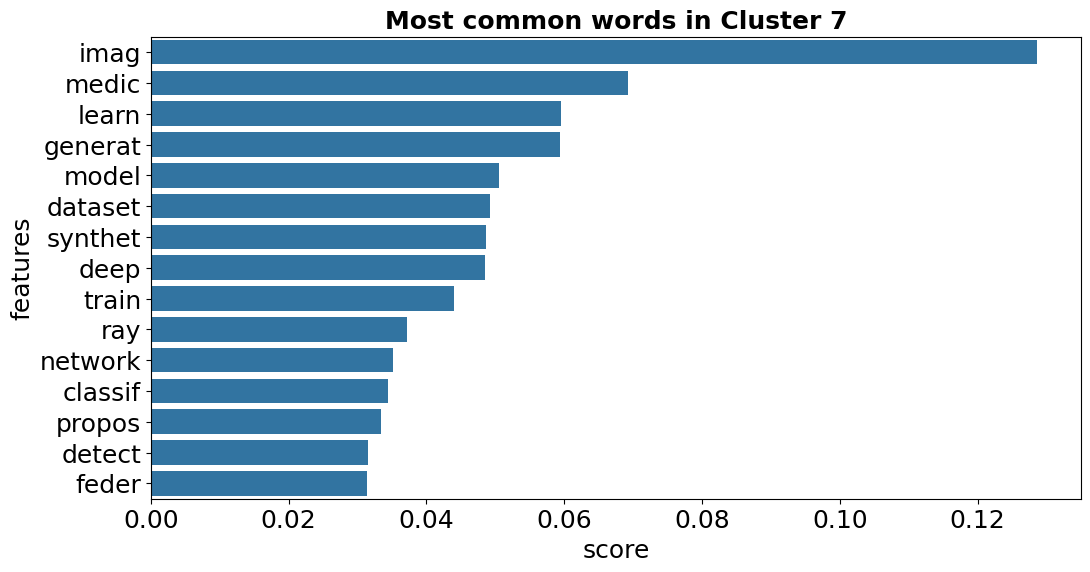

<Figure size 1200x600 with 0 Axes>

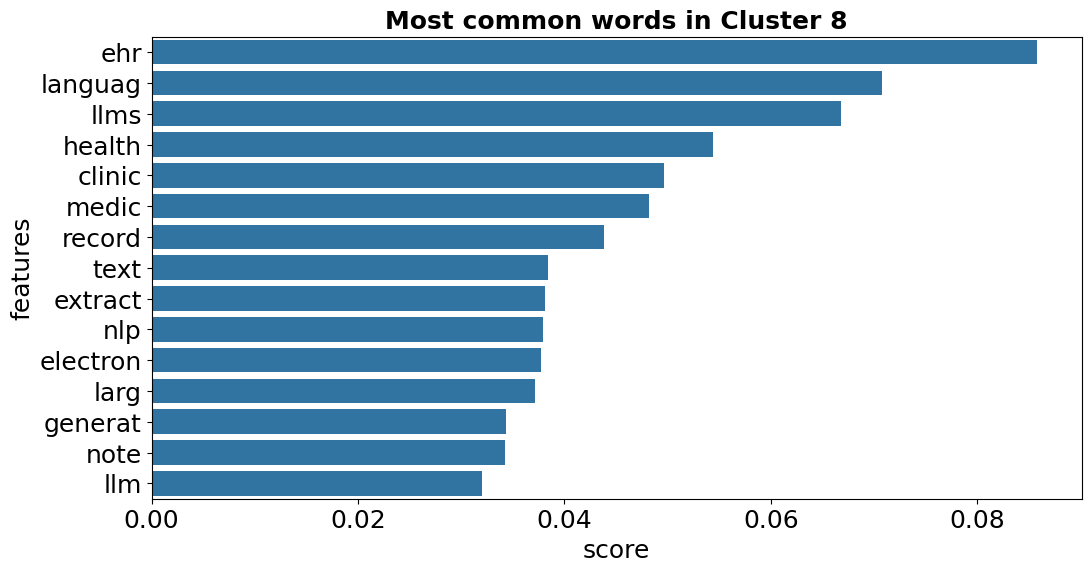

<Figure size 1200x600 with 0 Axes>

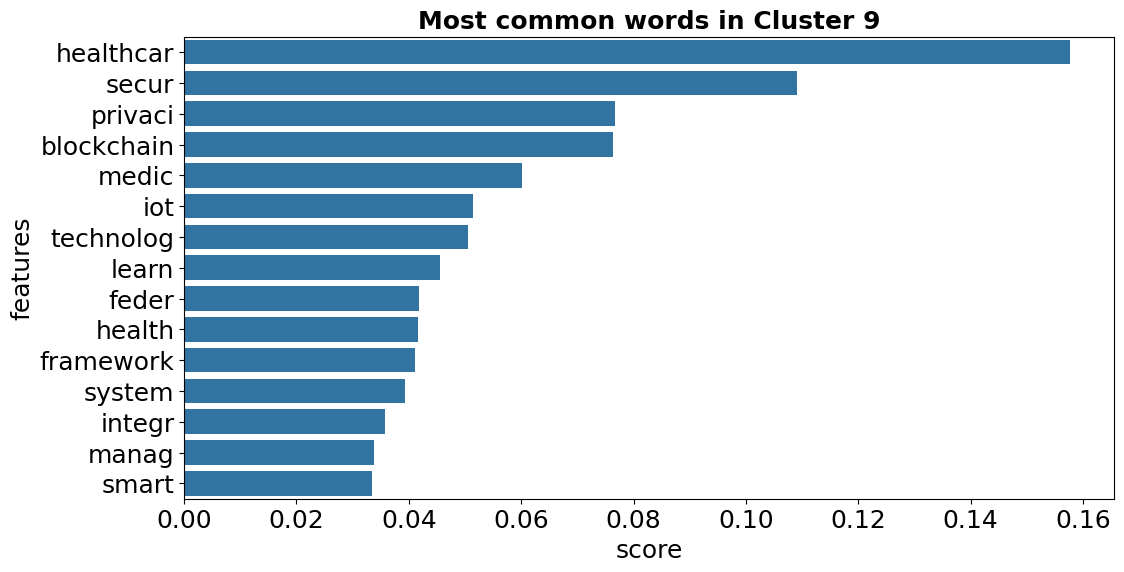

<Figure size 1200x600 with 0 Axes>

In [ ]:
#tf_final_2 = tf_final.to_numpy()
prediction = kmeans_best_result.predict(tf_final.to_numpy())
n_feats = 15
dfs = get_top_features_cluster(tf_final.to_numpy(), prediction, n_feats)
plotWords(dfs, 15);

[Back to top](#0)

## Map of Words
On the graphs above we can see the score of the best words in each cluster. Making a map of words allow us to visulize the text data in a nice way by display the key words that are closely related to the cluster concept.

In [ ]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

# Function that generate the WordClouds
def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

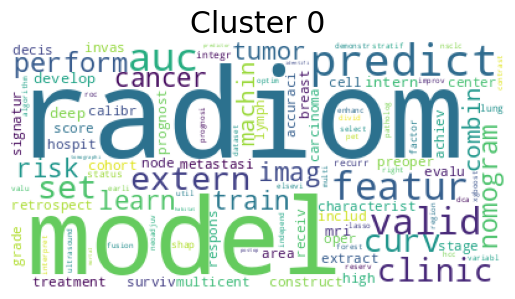

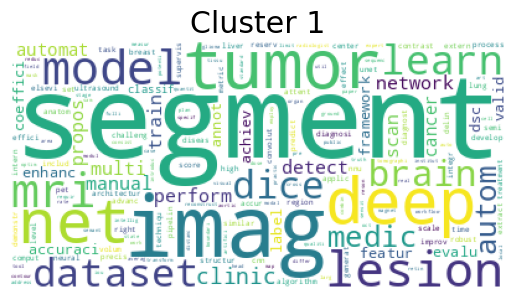

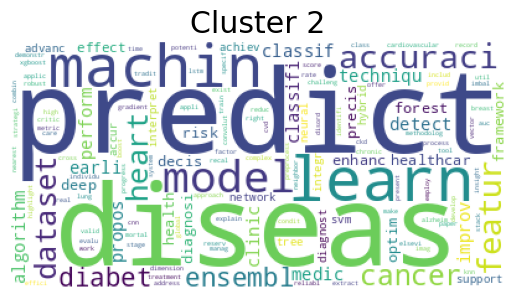

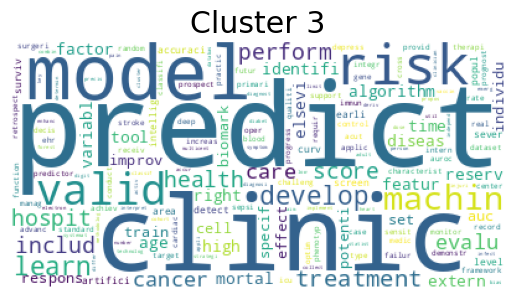

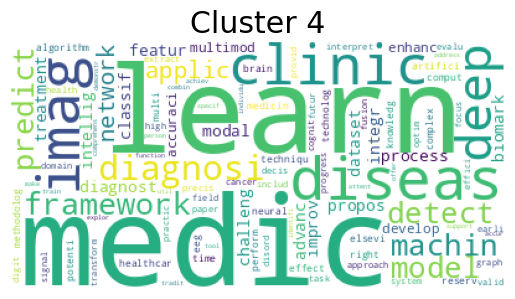

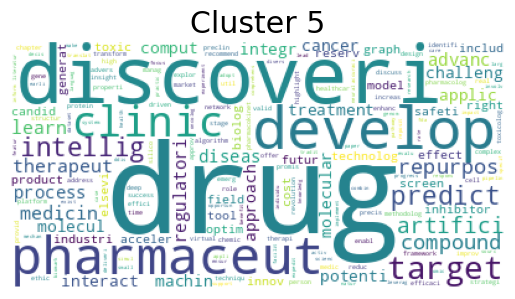

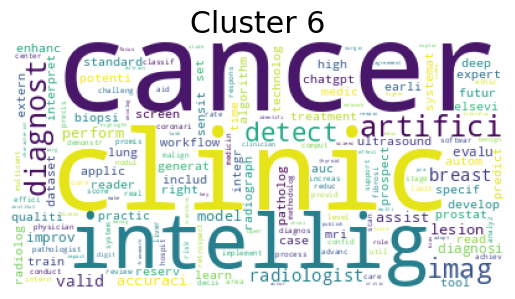

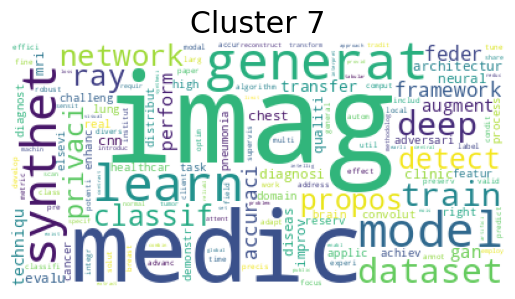

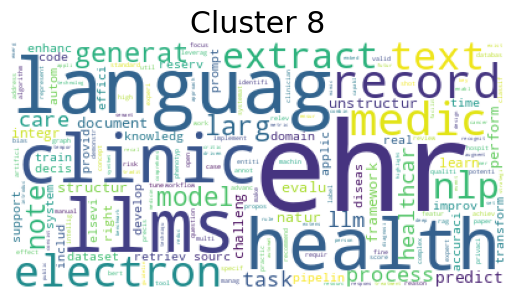

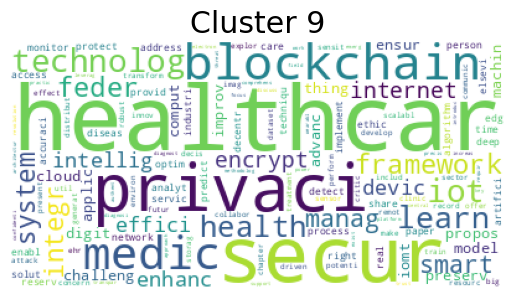

In [ ]:
centroids = pd.DataFrame(kmeans_best_result.cluster_centers_)
centroids.columns = tf_final.columns
generateWordClouds(centroids)

[Back to top](#0)

# <a id='10' style=color:black>10. Auto-tagging based on cluster centers</a>

If we are satisfied with our clustering, we should assign which abstract belongs to which group. <br>
Kmeans algorithm generates cluster labels, which represent the abstracts contained in these clusters.

In [ ]:
# Assigning the cluster labels to each abstract
df['Category'] = kmeans_best_result.labels_ # the last column you can see the label numebers
df.tail(5)
df_final['Cluster']=kmeans_best_result.labels_

### Saving data to CSV file (Optionally)
One can choose to save the dataframe in .csv files for faster access during computational analyses.<br>
We'll use pandas to save the DataFrame to csv file

In [ ]:
df_final.to_excel('abstract_by_cluster.xlsx')
# Uncomment the following to save the file

### Loading data (Optionally)

We'll use pandas to read the csv file contaning the titles and abstracts for each PMID.


In [ ]:
#df = pd.read_csv('abstract_by_cluster.csv')
#df.head()
# Uncomment the following to load cistus abstracts data

# <a id='11' style=color:black>11. Plotting clusters</a>
Each abstract labeled by number of cluster in the dataframe. To to visualize the K-Means clustering results, we used PCA to reduce the number of dimensions so that we can visualize the results using a 2D Scatter plot. Each cluster represente by different colors.

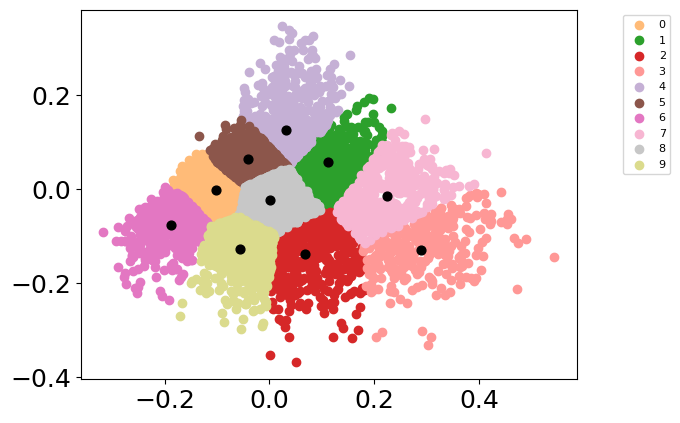

In [ ]:
#Load Data
data = tf_final
pca = PCA(2)

#Transform the data
dfp = pca.fit_transform(data)

df2=pd.DataFrame(dfp, columns = ['x','y'])
df=pd.concat([df,df2], axis=1)

#Initialize the class object
kmeans = kmeans_best_result

#predict the labels of clusters.
label = kmeans.fit_predict(dfp)

#Getting the Centroids
centroids = kmeans_best_result.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
cmap = plt.get_cmap("tab20")
category_colors = cmap(
        np.linspace(0.15, 0.85, best_result))

for i in u_labels:
    plt.scatter(dfp[label == i , 0] , dfp[label == i , 1] , label = i, color=category_colors[i])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = 'k')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), prop={'size': 8})
plt.show()

[Back to top](#0)

In [ ]:
import plotly.express as px
fig = px.scatter(df, x="x", y="y", color="Category")
fig.update_traces(hovertemplate='<b>x=%{x}  y=%{y} </b> <extra>%{text}</extra>')
fig.update_traces(hovertext=df["Title"])
fig.update_traces(text=df["Title"])
fig.show()

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

# Reduce dimensions to 3 using PCA
pca_3d = PCA(n_components=3)
dfp_3d = pca_3d.fit_transform(tf_final)

# Add the 3D PCA components to the dataframe
df['x_3d'] = dfp_3d[:, 0]
df['y_3d'] = dfp_3d[:, 1]
df['z_3d'] = dfp_3d[:, 2]

# Create a 3D scatter plot using Plotly
fig_3d = px.scatter_3d(df, x='x_3d', y='y_3d', z='z_3d', color='Category',
                     hover_data=['Title', 'Year', 'Abstract'])
fig_3d.update_layout(title='3D PCA of Article Clusters')
fig_3d.show()

Output hidden; open in https://colab.research.google.com to view.

## Frequency counts

In [ ]:
# How many abstracts belong to each cluster -> using group by in pandas
df.groupby(['Category'])['Year'].count()

Category
0     617
1     384
2     737
3    2389
4    1203
5     313
6     661
7     586
8     740
9     892
Name: Year, dtype: int64

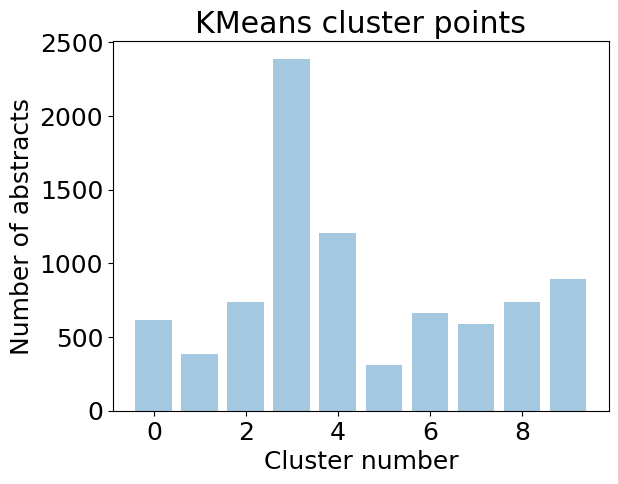

In [ ]:
# visually how many abstracts are distributed across the clusters
import matplotlib.pyplot as plt
plt.bar([x for x in range(best_result)], df.groupby(['Category'])['Year'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of abstracts")
plt.show()

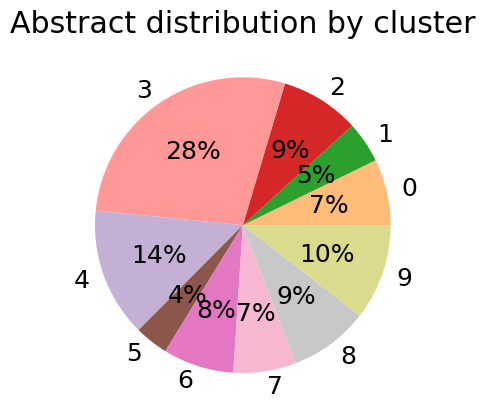

In [ ]:
#add colors

#colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown','tab:pink', 'tab:gray', 'tab:olive']
cmap = plt.get_cmap("tab20")

category_colors = cmap(
        np.linspace(0.15, 0.85, best_result))

df.groupby(['Category'])['Year'].count().plot.pie(colors=category_colors,autopct='%1.0f%%')
#df.groupby(['Category'])['Year'].count().plot.pie(colors=colors,autopct='%1.0f%%')
plt.title("Abstract distribution by cluster")
plt.ylabel("")
plt.savefig('pie.png')

[Back to top](#0)

# <a id='12' style=color:black>12. Distribution of clusters over the last years</a>

In [ ]:
# Here are some commands to prepere dataframe to be input to the graph of distribution of clusters by years
# group df by year
dfy = df.groupby(['Year','Category'])['Title'].count().to_frame()
dfy.reset_index(inplace=True)
# Create pivot table such as the category will be the variable (columns)
dfy_pv = dfy.pivot_table('Title','Year', 'Category')
# Calculate percentage
dfy_pv = dfy_pv.div(dfy_pv.sum(axis=1), axis=0)*100
dfy_pv.reset_index(level=0, inplace=True)
# No abstracts in the category at scpesic year will have zero value
dfy_pv = dfy_pv.fillna(0)
dfy_pv

Category  Year         0         1         2          3          4         5  \
0         2023  4.914412  4.693539  7.620099  31.198233  15.240199  4.251795   
1         2024  6.459249  4.565438  9.333784  27.933717  14.406493  3.550896   
2         2025  8.977091  4.368673  8.604156  26.584976  13.345765  3.489611   

Category         6         7         8          9  
0         7.730536  8.117062  6.405301   9.828824  
1         7.507609  6.459249  8.894149  10.889415  
2         7.964838  6.606287  9.616409  10.442195

In [ ]:
def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('tab20')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9,
                label=colname, color=color)
        xcenters = starts + widths / 2


    ax.legend(ncol=1, bbox_to_anchor=(1, 0.5),
              loc='center left', fontsize='large')

    return fig, ax


In [ ]:
df["Year"]=df["Year"].astype(int)

In [ ]:
df["Year"].unique()

array([2025, 2024, 2023])

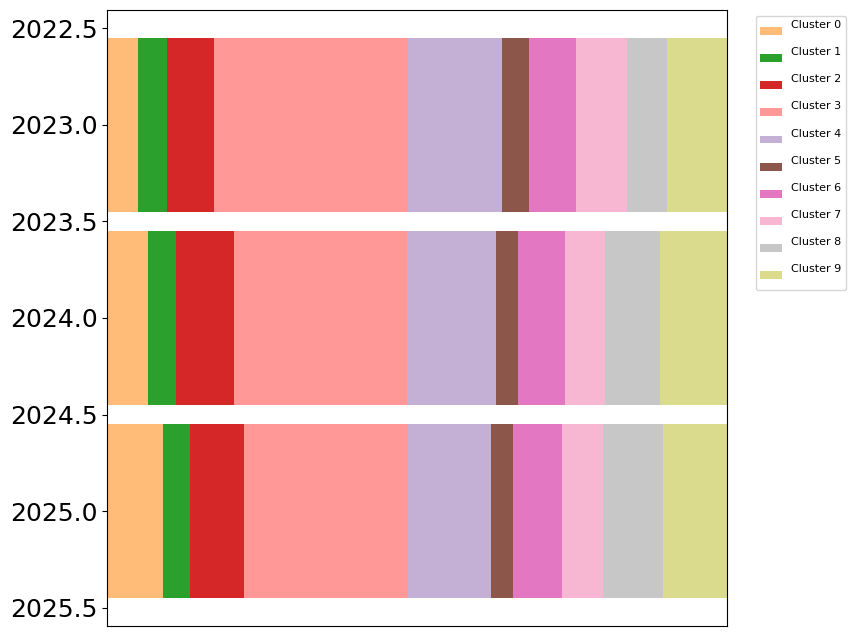

In [ ]:
category_names = ['Cluster 0\n', 'Cluster 1\n', 'Cluster 2\n', 'Cluster 3\n', 'Cluster 4\n', 'Cluster 5\n', 'Cluster 6\n', 'Cluster 7\n','Cluster 8\n', 'Cluster 9\n', 'Cluster 10\n', 'Cluster 11\n', 'Cluster 12\n', 'Cluster 13\n', 'Cluster 14\n', 'Cluster 15\n', 'Cluster 16\n','Cluster 17\n', 'Cluster 18\n', 'Cluster 19\n']
results = dfy_pv.set_index('Year').T.to_dict('list')
#key_order = ['2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002', '2001']
key_order=df["Year"].unique()
results = {k : results[k] for k in key_order if k > 1999}

survey(results, category_names)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), prop={'size': 8})
plt.savefig('bar.png', bbox_inches='tight')#
plt.show()

[Back to top](#0)

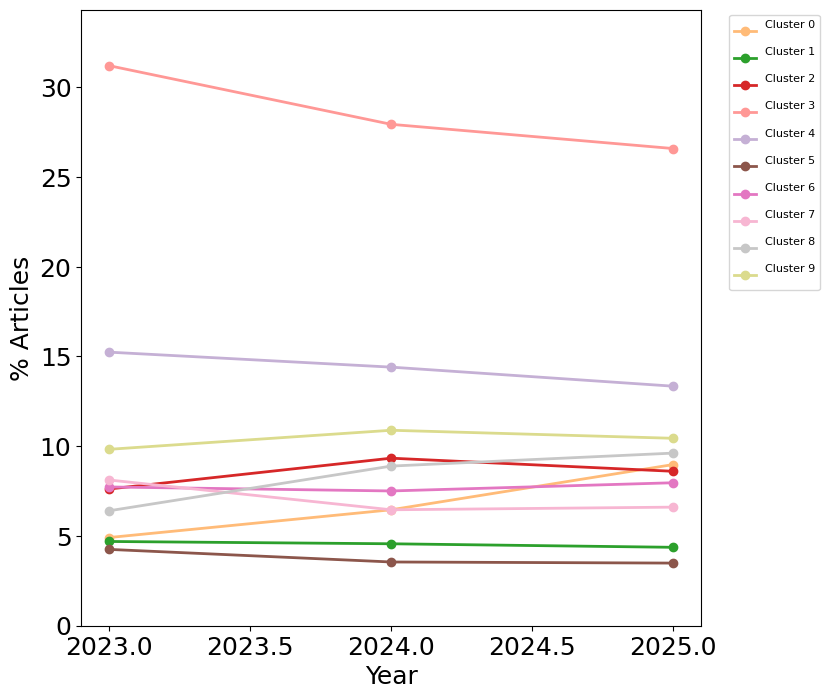

In [ ]:
def survey2(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('tab20')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 8))
    # ax.set_xlim(2000, 2022) # ajustar los límites del eje x según el rango de años
    # ax.set_xticks(range(2000, 2022, 4)) # ajustar las marcas del eje x según el rango de años
    # ax.set_xticklabels(range(2000, 2022, 4)) # ajustar las etiquetas del eje x según el rango de años
    ax.set_ylim(0, np.max(data, axis=1).max() * 1.1) # ajustar los límites del eje y según el rango de valores

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        ax.plot(labels, data[:, i], marker='o', linewidth=2,
                label=colname, color=color)

    ax.legend(ncol=1, bbox_to_anchor=(1, 0.5),
              loc='center left', fontsize='large')

    ax.set_title('')
    ax.set_xlabel('Year')
    ax.set_ylabel('% Articles')

    return fig, ax

df["Year"] = df["Year"].astype(int)
key_order = sorted(df["Year"].unique())

results = dfy_pv.set_index('Year').T.to_dict('list')
results = {k : results[k] for k in key_order if k > 1999}
category_names = ['Cluster 0\n', 'Cluster 1\n', 'Cluster 2\n', 'Cluster 3\n', 'Cluster 4\n', 'Cluster 5\n', 'Cluster 6\n', 'Cluster 7\n','Cluster 8\n', 'Cluster 9\n', 'Cluster 10\n', 'Cluster 11\n', 'Cluster 12\n', 'Cluster 13\n', 'Cluster 14\n', 'Cluster 15\n', 'Cluster 16\n','Cluster 17\n', 'Cluster 18\n', 'Cluster 19\n', 'Cluster 20\n']
cmap = plt.get_cmap("tab20")

survey2(results, category_names)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), prop={'size': 8})
plt.savefig('line.png', bbox_inches='tight')
plt.show()

# <a id='13'>13. Conclusions</a>

[Back to top](#0)

## Temporal Evolution Analysis of Individual Clusters (2023-2025)

Analyzing the temporal distribution of each cluster individually provides insights into the evolving focus within specific areas of AI clinical investigation:

*   **Cluster 0 (Healthcare, Health, Technology, Medicine, Security, Intelligence, Clinic, System, Blockchain, Integration, Care, Artificial, Management, Application):** This cluster shows a generally increasing trend in the proportion of publications from 2023 to 2025. This suggests a growing emphasis on the broader integration of AI into healthcare systems, including research on the technological infrastructure, security, and management aspects of AI in clinical settings.

*   **Cluster 1 (Predict, Model, Radiom, Valid, Risk, Auc, Featur, Machine, Learn, Perform, External, Develop, Set):** The proportion of articles in this cluster, focused on predictive modeling and risk assessment, appears to remain relatively stable or show a slight increase over the years. This indicates a consistent and sustained research interest in developing and validating AI models for clinical prediction.

*   **Cluster 2 (Drug, Discovery, Development, Pharmaceut, Clinic, Target, Predict, Compound, Disease, Repurpos, Learn, Intellig, Therapeut, Artificial):** This cluster, related to AI in drug discovery and development, shows a relatively stable proportion of publications across the years. While not exhibiting rapid growth in proportion, it signifies a continued research effort in applying AI techniques to pharmaceutical research.

*   **Cluster 3 (Image, Clinic, Learn, Model, Detect, Disease, Cancer, Deep, Accuraci, Dataset, Predict, Classif, Segment, Features):** As the largest cluster, medical imaging analysis maintains a dominant presence. However, its proportion appears to slightly decrease from 2023 to 2025. This could indicate that while the absolute number of publications in this area is likely still increasing due to the overall growth of the field, other research areas are growing at a faster proportional rate.

*   **Cluster 4 (Medic, Privaci, Image, Learn, Feder, Generat, Model, Framework, Secur, Healthcare, Dataset, Propos, Preserv, Train):** This cluster, focusing on data privacy, security, and advanced AI techniques, shows a clear increasing trend in its proportion of publications. This is a significant finding, indicating a growing research emphasis on addressing the ethical, privacy, and security challenges associated with deploying AI in healthcare and exploring cutting-edge AI methodologies.

*   **Other Clusters (Clusters 5, 6, 7, 8, 9):** The remaining clusters, representing more specific areas like drug molecules (Cluster 5), cancer diagnosis (Cluster 6), image generation (Cluster 7), electronic health records and NLP (Cluster 8), and healthcare security and blockchain (Cluster 9), show varying trends but generally maintain a relatively stable or slightly fluctuating proportion of publications over the years. These clusters highlight the diverse and specialized applications of AI being explored within clinical investigation.

In conclusion, the temporal analysis of individual clusters reveals a dynamic research landscape where established areas continue to be explored while there is a clear surge in research focused on the systemic integration, security, and privacy of AI in healthcare, as well as the application of more advanced AI techniques.

## Potential Applications of RAGs Based on Research Trends

Considering the identified research trends and the nature of Retrieval Augmented Generation (RAG) systems, here are some potential applications in clinical investigation:

RAG systems, which combine the power of large language models (LLMs) with the ability to retrieve information from external knowledge sources, can be particularly valuable in a field like clinical investigation that relies heavily on up-to-date and accurate information.

Based on the cluster analysis:

*   **Enhancing Literature Review and Knowledge Synthesis (Relevant to all clusters):** RAGs can significantly accelerate and improve the process of conducting literature reviews. Given the vast and ever-growing body of research (as evidenced by the large number of abstracts), RAGs can retrieve relevant studies based on a query and then generate synthesized summaries, identify key findings, and even highlight conflicting information across different studies within any of the identified clusters. This directly supports the foundational work in all research areas.

*   **Improving Clinical Decision Support Systems (Relevant to Clusters 0, 1, 3, 4, 6):** RAGs can power more sophisticated clinical decision support systems. By retrieving the latest clinical guidelines, research findings, and patient data, a RAG can provide clinicians with context-aware and evidence-based insights to aid in diagnosis (Cluster 3, 6), treatment planning (Cluster 0), and risk assessment (Cluster 1). The ability to access external, continuously updated information is crucial in the rapidly evolving medical field.

*   **Facilitating Drug Discovery and Repurposing (Relevant to Cluster 2):** In drug discovery, RAGs can retrieve information about existing drugs, biological targets, disease pathways, and research findings to suggest potential new drug candidates or identify existing drugs that could be repurposed for other conditions. They can synthesize information from various databases and publications to generate hypotheses for further investigation.

*   **Generating병원 Summaries and Reports (Relevant to Clusters 0, 8):** Given the focus on electronic health records (EHRs) and natural language processing (Cluster 8), RAGs can be used to generate concise summaries of patient histories, retrieve specific information from clinical notes, and assist in generating research reports by pulling relevant data and findings.

*   **Supporting Research on AI Explainability and Trust (Relevant to Clusters 0, 4):** As research increasingly focuses on the trustworthiness and explainability of AI models (Cluster 0, 4), RAGs can be used to retrieve and present the evidence and reasoning behind an AI model's prediction or recommendation. This can help researchers and clinicians understand *why* an AI model arrived at a particular conclusion, fostering trust and facilitating the adoption of AI in clinical practice.

*   **Addressing Data Privacy and Security Concerns (Relevant to Cluster 4):** While RAGs themselves need to be implemented with privacy in mind, they can assist in research related to data privacy by retrieving and summarizing information on privacy-preserving techniques and regulations (Cluster 4). They can help researchers stay updated on best practices and emerging solutions in this critical area.

In essence, RAG systems can act as intelligent assistants for researchers and clinicians in clinical investigation by providing efficient access to relevant knowledge and generating synthesized information, thereby accelerating discovery, improving decision-making, and supporting the development of more robust and trustworthy AI applications.